<a href="https://www.kaggle.com/code/ankumagawa/fraud-prediction-smote-model?scriptVersionId=126005250" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/creditcardfraud/creditcard.csv


## 1) Load packages:

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## 2) Import data: 


In [3]:
df= pd.read_csv('../input/creditcardfraud/creditcard.csv')
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


- The data contains only numerical input variables which are the result of a PCA transformation.

- Due to confidentiality issues, there are not provided the original features and more background information about the data.

- Features V1, V2, ... V28 are the principal components obtained with PCA;

- The only features which have not been transformed with PCA are Time and Amount. Feature Time contains the seconds elapsed between each transaction and the first transaction in the dataset. 

- The feature Amount is the transaction Amount, this feature can be used for example-dependant cost-senstive learning.

- Feature Class is the response variable and it takes value 1 in case of fraud and 0 otherwise.

## 3) Understanding the data:

In [4]:
# feature Dtype:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
#describe data:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
# check null value:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

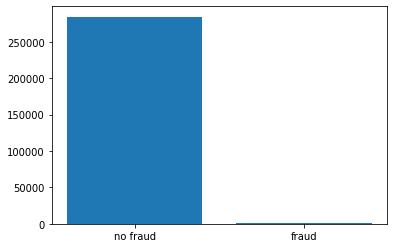

In [7]:
#check the balance of target:
df['Class'].value_counts()
plt.bar(x= ['no fraud','fraud'],height=df['Class'].value_counts())
plt.show()

- The original dataset is heavily imbalanced! 

- Most of the transactions are non-fraud. 

- If we use this dataframe as the base for our predictive models and analysis we might get a lot of errors and our algorithms will probably overfit since it will "assume" that most transactions are not fraud. But we don't want our model to assume, we want our model to detect patterns that give signs of fraud!

## 4) Increase successful detection using SMOTE:
 
- Synthetic Minority Oversampling Technique (SMOTE):  is a way of adjusting the imbalance by oversampling your minority observations, aka your fraud cases. 

- But with SMOTE, we're not just copying the minority class. Instead, as you see in this picture, SMOTE uses characteristics of nearest neighbors of fraud cases to create new synthetic fraud cases, and thereby avoids duplicating observations.

- One thing to keep in mind when using resampling methods, is to only resample on your training set.

In [8]:
def plot_data(X: np.ndarray, y: np.ndarray):
    plt.scatter(X[y == 0, 0], X[y == 0, 1], label="Class #0", alpha=0.5, linewidth=0.15)
    plt.scatter(X[y == 1, 0], X[y == 1, 1], label="Class #1", alpha=0.5, linewidth=0.15, c='r')
    plt.legend()
    return plt.show()

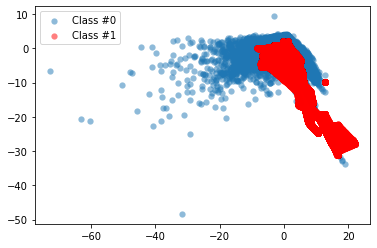

In [9]:
from imblearn.over_sampling import SMOTE

#copy original data:

new_df=df.copy()

# set feature and target::
X = new_df.iloc[:, 2:30].values
y = new_df.Class.values

# Define the resampling method
method = SMOTE(sampling_strategy='auto')

# Create the resampled feature set
X_resampled, y_resampled = method.fit_resample(X, y)

# Plot the resampled data
plot_data(X_resampled, y_resampled)

The minority class is now much more prominently visible in our data. 

To see the results of SMOTE even better, we'll compare it to the original data .

## 5) Compare SMOTE to original data


In [10]:
print('number of fraud cases in the original data is', len(df[df['Class']==1]))
print('number of fraud case after applying SMOTE is', len(y_resampled))

number of fraud cases in the original data is 492
number of fraud case after applying SMOTE is 568630


In [11]:
len(X_resampled)

568630

In [12]:
def compare_plot(X: np.ndarray, y: np.ndarray, X_resampled: np.ndarray, y_resampled: np.ndarray, method: str):
    plt.subplot(1, 2, 1)
    plt.scatter(X[y == 0, 0], X[y == 0, 1], label="Class #0", alpha=0.5, linewidth=0.15)
    plt.scatter(X[y == 1, 0], X[y == 1, 1], label="Class #1", alpha=0.5, linewidth=0.15, c='r')
    plt.title('Original Set')
    plt.subplot(1, 2, 2)
    plt.scatter(X_resampled[y_resampled == 0, 0], X_resampled[y_resampled == 0, 1], label="Class #0", alpha=0.5, linewidth=0.15)
    plt.scatter(X_resampled[y_resampled == 1, 0], X_resampled[y_resampled == 1, 1], label="Class #1", alpha=0.5, linewidth=0.15, c='r')
    plt.title(method)
    plt.legend()
    plt.show()

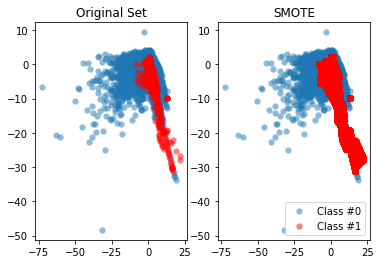

In [13]:
compare_plot(X, y, X_resampled, y_resampled, method='SMOTE')

- SMOTE has balanced our data completely, and that the minority class is now equal in size to the majority class. Visualizing the data shows the effect on the data very clearly.

- From now on we will go through different approach to detect fraud:

    * Traditional method to detect fraud

    *  Logistic Regression to detect fraud

    *  Logistic Regression with SMOTE to detect fraud


## 6) Traditional method to Detect Fraud:

- We will define threshold values using common statistics, to split fraud and non-fraud. Then, use those thresholds on the features to detect fraud. 

- We will make feature means differ between fraud and non-fraud cases. Then, we use that information to create common sense thresholds. Finally, we'll check how well this performs in fraud detection.



In [14]:
dft= df.copy()
dft.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [15]:
dft['flag_as_fraud'] = np.where(np.logical_and(df.V1 < -3, df.V3 < -5), 1, 0)
dft['flag_as_fraud'] 

0         0
1         0
2         0
3         0
4         0
         ..
284802    1
284803    0
284804    0
284805    0
284806    0
Name: flag_as_fraud, Length: 284807, dtype: int64

In [16]:

pd.crosstab(dft.Class, dft.flag_as_fraud, rownames=['Actual Fraud'], colnames=['Flagged Fraud'])

Flagged Fraud,0,1
Actual Fraud,,
0,283089,1226
1,322,170


 Apply tradition method, 170 out of 492 fraud cases are detected, 322 are not detected, and 1226 false positives are identified.

This model is not very accurate. Let's move to next model to see how the prediction can be improved!

## 7) Logistic Regression to Detect Fraud:

In [17]:
# copy the orginal dataset:
df_lr= df.copy()
# Normalising the amount column. The amount column is not in line with the anonimised features.¶
from sklearn.preprocessing import StandardScaler

scaler= StandardScaler()

df_lr['Amount_scaled']= scaler.fit_transform(df_lr['Amount'].values.reshape(-1,1))

df_lr= df_lr.drop(columns= ['Time','Amount'])

df_lr

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,Amount_scaled
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0,-0.350151
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,0,-0.254117
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,0,-0.081839
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,0,-0.313249


In [18]:
X= df_lr[['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount_scaled']]

y= df_lr['Class']

print(X.shape, y.shape)

(284807, 29) (284807,)


In [19]:
# train, test split: 

from sklearn.model_selection import train_test_split

X_train, X_test, y_train,y_test = train_test_split( X, y, train_size= 0.7, random_state= 1)


In [20]:
# Fit a logistic regression model to our data
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

lgr= LogisticRegression()

lgr.fit(X_train, y_train)

# Obtain model predictions
y_predict = lgr.predict(X_test)


# Print the classifcation report and confusion matrix
print('Classification report:\n', classification_report(y_test, y_predict))
print('Confusion matrix:\n', confusion_matrix(y_test, y_predict))


Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85308
           1       0.83      0.58      0.68       135

    accuracy                           1.00     85443
   macro avg       0.91      0.79      0.84     85443
weighted avg       1.00      1.00      1.00     85443

Confusion matrix:
 [[85292    16]
 [   57    78]]


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


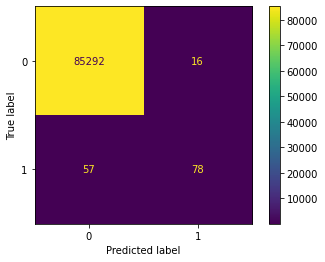

In [21]:
# Plot non-normalized confusion matrix
from sklearn.metrics import plot_confusion_matrix
                      
plot_confusion_matrix(lgr, X_test, y_test)                  


Compare to the traditional approach, using Logistic Regression improved the detection alot. However the number of false positve and false nagative are still high.

Next step, we will try Logistic regression with SMOTE to improve the accuracy

# 8) Logistic regression and SMOTE:

In [22]:
from imblearn.pipeline import make_pipeline

pipe = make_pipeline(SMOTE(sampling_strategy=0.1), LogisticRegression(solver='liblinear'))



In [23]:
# Split your data X and y, into a training and a test set and fit the pipeline onto the training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

pipe = make_pipeline(SMOTE(sampling_strategy=0.1), LogisticRegression(solver='liblinear'))



In [24]:
pipe.fit(X_train, y_train) 
y_predicted = pipe.predict(X_test)


In [25]:

# Print the classifcation report and confusion matrix
print('Classification report:\n', classification_report(y_test, y_predict))
print('Confusion matrix:\n', confusion_matrix(y_test, y_predict))

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.00      0.00      0.00       147

    accuracy                           1.00     85443
   macro avg       0.50      0.50      0.50     85443
weighted avg       1.00      1.00      1.00     85443

Confusion matrix:
 [[85202    94]
 [  147     0]]


In [26]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())
  

In [27]:
lr1 = LogisticRegression()
lr1.fit(X_train_res, y_train_res.ravel())
predictions = lr1.predict(X_test)
  
# print classification report
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85296
           1       0.06      0.92      0.11       147

    accuracy                           0.98     85443
   macro avg       0.53      0.95      0.55     85443
weighted avg       1.00      0.98      0.99     85443

[[83194  2102]
 [   12   135]]


In [28]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import roc_auc_score as rocauc
from sklearn.pipeline import FeatureUnion, Pipeline
from imblearn.over_sampling import SMOTE
import seaborn as sns

In [29]:
logistic_pipeline = Pipeline([
    ('selector', SelectKBest(f_classif, k='all')), # variable selection procedure
    ('classifier', LogisticRegression())           # Logistic modeling
])

In [30]:
df.keys()

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

Text(0.5, 1.0, 'Response Variable Ratio, SMOTE')

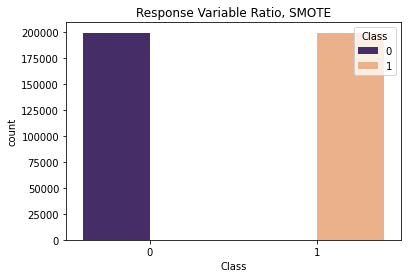

In [31]:
#perform random under-sampling and SMOTE on training dataset
sm=SMOTE(random_state=1)
X_sm, y_sm = sm.fit_resample(X_train, y_train)

#simple_reservation_status broken out by is_canceled
y_t = pd.DataFrame(y_sm)
Bar_chart=sns.countplot(data=y_t, x='Class', hue="Class", palette=['#432371',"#FAAE7B"])
Bar_chart.set_xticklabels(Bar_chart.get_xticklabels())
plt.title("Response Variable Ratio, SMOTE")

Overall Accuracy: 97.54456187165714%
ROC AUC Score: 94.69556674667615%
confusion matrix:
 [[83210  2086]
 [   12   135]]
classification_reoirt:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     85296
           1       0.06      0.92      0.11       147

    accuracy                           0.98     85443
   macro avg       0.53      0.95      0.55     85443
weighted avg       1.00      0.98      0.99     85443



/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


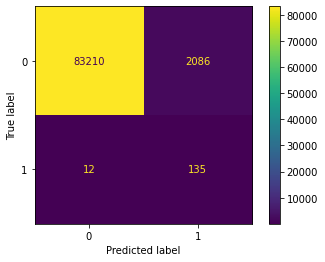

In [32]:
# fit the logistic model
logistic_pipeline.fit(X_sm, y_sm)
y_test_pred = logistic_pipeline.predict(X_test)

#get ROC AUC score https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html
rocscore = rocauc(y_test, y_test_pred)

#print results
print(f'Overall Accuracy: {100*logistic_pipeline.score(X_test, y_test)}%')
print(f'ROC AUC Score: {100*rocscore}%')
print('confusion matrix:\n',confusion_matrix(y_test, y_test_pred))
print('classification_reoirt:\n', classification_report(y_test, y_test_pred))
plot_confusion_matrix(logistic_pipeline, X_test, y_test)